#**Trabajo Práctico N°2: Críticas Cinematográficas**
Organización de Datos (7506): cátedra Rodriguez

Grupo 25 (Orga de gatos):
- Mariana Juarez Goldemberg - Padrón: 108441
- Lisandro Roman - Padrón: 107274
- Miranda Marenzi - Padrón: 109404

Única entrega

El trabajo consiste en construir diferentes modelos de clasificación, capaces de analizar una
porción de texto en lenguaje natural y detectar el sentimiento allí presente, al menos de forma
binaria: positivo o negativo.
Para ello habrá que realizar un preprocesamiento del texto para que este pueda ser analizado
por los distintos modelos. Se utilizará el modelo de bag of words, o cualquier otro que permita
convertir texto en vectores.


Los modelos que se deben construir son los siguientes:

● Bayes Naïve

● Random Forest

● XGBoost

● Un modelo de red neuronal aplicando Keras y Tensor Flow.

● Un ensamble de al menos 3 modelos elegidos por el grupo.

Para cada uno de estos modelos se debe realizar una búsqueda de hiperparametros que
optimicen su desempeño en el conjunto de test local (porción del archivo training).
Una vez encontrados dichos hiperparametros, se procederá a hacer un submit a Kaggle. Es decir
que habrá al menos 5 submits (uno por cada modelo).

##Librerías

In [ ]:
!pip install keras==2.12.0
!pip uninstall tensorflow -y
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.
Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 35.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorf

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from keras import layers
import matplotlib.pyplot as plt
import os
import re
import shutil
import string

from tensorflow.keras import layers
from tensorflow.keras import losses

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.layers import GRU, Dense

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
import numpy as np

import sklearn as sk
from sklearn.metrics import DistanceMetric

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

!pip install nltk
import nltk
import spacy

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import loguniform
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline

from joblib import dump, load
from os.path import exists

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))

  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

##Carga de los Datasets

In [ ]:
df_train_reviews = pd.read_csv("/content/sample_data/train.csv")
df_test_reviews = pd.read_csv("/content/sample_data/test.csv")

In [ ]:
df_test_reviews = pd.read_csv("/content/sample_data/test.csv")

In [ ]:
df_train = df_train_reviews.copy()
df_test = df_test_reviews.copy()

In [ ]:
df_test = df_test_reviews.copy()

In [ ]:
df_train.head(5)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


In [ ]:
df_train.shape

(50000, 3)

In [ ]:
df_test.head(5)

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."


In [ ]:
df_test.shape

(8599, 2)

##Preprocesamiento de los datos

Quitamos la columna de ID que no aporta nada de información

In [ ]:
df_train = df_train.drop(["ID"],  axis='columns', inplace=False)
df_train.head(5)

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


###Lematización

Vamos a lematizar el texto.

In [ ]:
!python -m spacy download es_core_news_sm
!python -m spacy download es

2023-11-25 19:04:39.560275: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 19:04:39.560437: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 19:04:39.560600: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 19:04:41.379075: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 38.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
2023-11-25 19:04:58.304928: E tensorflow/compiler/xla/s

In [ ]:
nlp = spacy.load('es_core_news_sm')

In [ ]:
def lematizar_texto(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc]
    return ' '.join(lemas)

In [ ]:
df_train['texto_recodificado'] = df_train['review_es'].apply(lematizar_texto)

In [ ]:
df_train.to_csv('train_con_lematizacion.csv', index=False)

In [ ]:
df_train['texto_recodificado'].head(5)

0    uno de el otro crítico haber mencionar que des...
1    uno pequeño pequeño producción . el técnica de...
2    pensar que este ser uno manera maravilloso de ...
3    básicamente , haber uno familia donde uno niño...
4    el " amor en el tiempo " de Petter Mattei ser ...
Name: texto_recodificado, dtype: object

###Limpieza

Realizamos una limpieza de las oraciones

In [ ]:
pip install unidecode

In [ ]:
from unidecode import unidecode

In [ ]:
def limpiar_texto(texto):
    #Convertir texto a minúsculas
    texto = texto.lower()

    #Eliminar diacríticos usando la biblioteca unidecode
    texto = unidecode(texto)

    #Eliminar caracteres no alfabéticos y signos de puntuación usando expresiones regulares
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)

    #Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))

    #Eliminamos las palabras que tengan un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)

    #Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)

    #Tokenización de palabras
    palabras = word_tokenize(texto)

    #Eliminar stopwords (palabras comunes que no aportan mucho significado)
    stop_words = set(stopwords.words('spanish'))
    palabras = [palabra for palabra in palabras if palabra not in stop_words]

    #Unir palabras limpias de nuevo en texto
    texto_limpio = ' '.join(palabras)

    return texto_limpio

In [ ]:
df_train['texto_recodificado'] = df_train['texto_recodificado'].apply(limpiar_texto)

In [ ]:
df_train['texto_recodificado'].head(5)

0    uno de los otros criticos ha mencionado que de...
1    una pequena pequena produccion la tecnica de f...
2    pense que esta era una manera maravillosa de p...
3    basicamente hay una familia donde un nino pequ...
4    el amor en el tiempo de petter mattei es una p...
Name: texto_recodificado, dtype: object

###Stopwords

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('spanish'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [ ]:
df_train['texto_recodificado'] = df_train['texto_recodificado'].apply(remove_stop_words)

###Tokenización

Vamos a tokenizar. Agrego una nueva columna al dataset que tenga 1 vector con las palabras de cada review

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
regexp = RegexpTokenizer('\w+')

df_train['text_token'] = df_train['texto_recodificado'].apply(regexp.tokenize)
df_train['text_token'].head(5)

0    [uno, de, los, otros, criticos, ha, mencionado...
1    [una, pequena, pequena, produccion, la, tecnic...
2    [pense, que, esta, era, una, manera, maravillo...
3    [basicamente, hay, una, familia, donde, un, ni...
4    [el, amor, en, el, tiempo, de, petter, mattei,...
Name: text_token, dtype: object

###Reseñas en inglés

Ahora, eliminaremos las observaciones en ingles

In [ ]:
pip install langid

In [ ]:
import langid

In [ ]:
def detect_language(text):
    return langid.classify(text)[0]

In [ ]:
df_train['language'] = df_train['review_es'].apply(detect_language)
df_ingles = df_train[df_train['language'] == 'en']

In [ ]:
df_ingles.head(10)

,review_es,sentimiento,texto_recodificado,text_token,language
156,From the film's first shot - Keira Knightley a...,negativo,from the film first shot keira knightley as el...,"[from, the, film, first, shot, keira, knightle...",en
249,'Airport 4' is basically a slopped together me...,negativo,airport 4 is basically slopped together mess ...,"[airport, 4, is, basically, slopped, together,...",en
250,"Supposedly a ""social commentary"" on racism and...",negativo,supposedly social commentary on racism and pri...,"[supposedly, social, commentary, on, racism, a...",en
263,"There is a difference between a ""film,"" and a ...",negativo,there is difference between film and movie fil...,"[there, is, difference, between, film, and, mo...",en
264,please re-watch all 3 series and do not go see...,negativo,please re watch all 3 series and do not go see...,"[please, re, watch, all, 3, series, and, do, n...",en
265,Finally! An Iranian film that is not made by M...,positivo,finally an iranian film that is not made by ma...,"[finally, an, iranian, film, that, is, not, ma...",en
267,Tainted look at kibbutz lifeThis film is less ...,negativo,tainted look at kibbutz lifethis film is less ...,"[tainted, look, at, kibbutz, lifethis, film, i...",en
274,What an incomprehensible mess of a movie Somet...,negativo,what an incomprehensible mess of movie somethi...,"[what, an, incomprehensible, mess, of, movie, ...",en
275,I love to watch this movie a lot because of al...,positivo,i love to watch this movie lot because of all ...,"[i, love, to, watch, this, movie, lot, because...",en
278,I watched this movie for the hot guy--and even...,negativo,i watched this movie for the hot guy and even ...,"[i, watched, this, movie, for, the, hot, guy, ...",en


In [ ]:
df_ingles.shape

(1817, 5)

Nos quedamos con el dataframe que solo tiene reseñas en español

In [ ]:
df_no_ingles = df_train[df_train['language'] != 'en']

df_no_ingles = df_no_ingles.drop(columns=['language'])
# Ahora, df_no_ingles contiene solo las filas que no están en inglés

df_train = df_no_ingles.copy()

df_train.head(10)

,review_es,sentimiento,texto_recodificado,text_token
0,Uno de los otros críticos ha mencionado que de...,positivo,uno de los otros criticos ha mencionado que de...,"[uno, de, los, otros, criticos, ha, mencionado..."
1,Una pequeña pequeña producción.La técnica de f...,positivo,una pequena pequena produccion la tecnica de f...,"[una, pequena, pequena, produccion, la, tecnic..."
2,Pensé que esta era una manera maravillosa de p...,positivo,pense que esta era una manera maravillosa de p...,"[pense, que, esta, era, una, manera, maravillo..."
3,"Básicamente, hay una familia donde un niño peq...",negativo,basicamente hay una familia donde un nino pequ...,"[basicamente, hay, una, familia, donde, un, ni..."
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,el amor en el tiempo de petter mattei es una p...,"[el, amor, en, el, tiempo, de, petter, mattei,..."
5,Probablemente mi película favorita de todos lo...,positivo,probablemente mi pelicula favorita de todos lo...,"[probablemente, mi, pelicula, favorita, de, to..."
6,Seguro que me gustaría ver una resurrección de...,positivo,seguro que me gustaria ver una resurreccion de...,"[seguro, que, me, gustaria, ver, una, resurrec..."
7,"Este espectáculo fue una idea increíble, fresc...",negativo,este espectaculo fue una idea increible fresca...,"[este, espectaculo, fue, una, idea, increible,..."
8,Alentados por los comentarios positivos sobre ...,negativo,alentados por los comentarios positivos sobre ...,"[alentados, por, los, comentarios, positivos, ..."
9,"Si te gusta la risa original desgarradora, te ...",positivo,si te gusta la risa original desgarradora te g...,"[si, te, gusta, la, risa, original, desgarrado..."


##Datasets de entrenamiento y test

In [ ]:
df_prep = pd.read_csv("/content/sample_data/train_preprocesado.csv")

In [ ]:
df_nostopword = pd.read_csv("/content/sample_data/train_preprocesado_sin_lematizacion_stopwords.csv")

In [ ]:
df_notokens = pd.read_csv("/content/sample_data/train_preprocesado_sin_tokens.csv")

In [ ]:
df_no_lem = pd.read_csv("/content/sample_data/train_preprocesado_sin_lematizacion.csv")

In [ ]:
df_train = df_no_lem.copy()

In [ ]:
df_trabajo_x = df_train.drop(["sentimiento"],  axis='columns', inplace=False)

df_trabajo_y = df_train['sentimiento'].copy()

x_train, x_test, y_train, y_test = train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.30,
                                                    random_state=9,
                                                    shuffle=True
                                                    )

Utilizaremos versiones acotadas de los archivos de entrenamiento para agilizar la busqueda de hiperparametros en los distintos modelos.

In [ ]:
mini_x_train, gran_x_test, mini_y_train, gran_y_test = train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.70,
                                                    random_state=9,
                                                    shuffle=True
                                                    )

In [ ]:
mini_x_train.shape

(14454, 3)

##Modelo 1: Bayes Naïve

#####Modelo Inicial

Hacemos una primera predicción del modelo de Bayes sin muchos cambios en el dataset (solo le sacamos las stopwords), para ver el comportamiento de la predicción.

In [ ]:
if exists('/content/modelos/ModeloBayes-inicial.joblib') == False:
  bayesNaive = make_pipeline(TfidfVectorizer(), MultinomialNB())
  bayesNaive.fit(x_train.review_es, y_train)

  dump(bayesNaive, '/content/modelos/ModeloBayes-inicial.joblib')
else:
  bayesNaive = load('/content/modelos/ModeloBayes-inicial.joblib')

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      7208
           1       0.88      0.83      0.86      7247

    accuracy                           0.86     14455
   macro avg       0.86      0.86      0.86     14455
weighted avg       0.86      0.86      0.86     14455



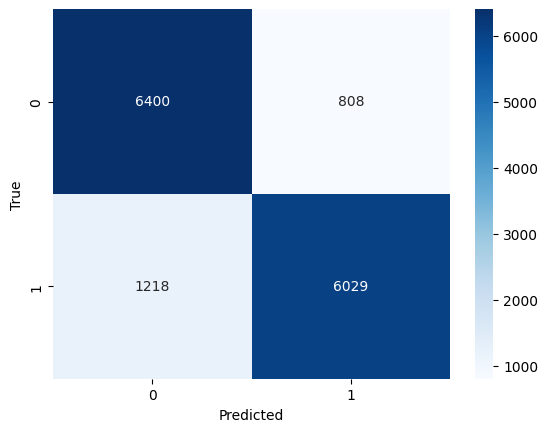

In [ ]:
y_pred = bayesNaive.predict(x_test.review_es)
metricas(y_pred,y_test)

In [ ]:
y_pred_naive = bayesNaive.predict(df_test.review_es)
ds_resultados = pd.DataFrame({'id': df_test_reviews['ID'], 'sentimiento': y_pred_naive})
ds_resultados.to_csv('bayes_base.csv', index=False)

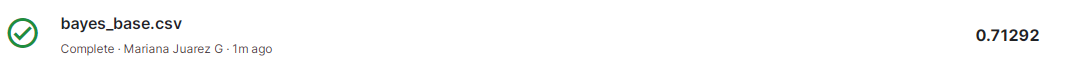

#####Modelo con texto preprocesado

Ahora, realizaremos una predicción con el dataframe ya procesado.

In [ ]:
if exists('/content/modelos/ModeloBayes-base.joblib') == False:
  bayesNaive = make_pipeline(TfidfVectorizer(), MultinomialNB())
  bayesNaive.fit(x_train.texto_recodificado, y_train)

  dump(bayesNaive, '/content/modelos/ModeloBayes-base.joblib')
else:
  bayesNaive = load('/content/modelos/ModeloBayes-base.joblib')

Prediccion con el conjunto de prueba

In [ ]:
y_pred = bayesNaive.predict(x_test.review_es)

              precision    recall  f1-score   support

    negativo       0.84      0.83      0.84      7208
    positivo       0.83      0.85      0.84      7247

    accuracy                           0.84     14455
   macro avg       0.84      0.84      0.84     14455
weighted avg       0.84      0.84      0.84     14455



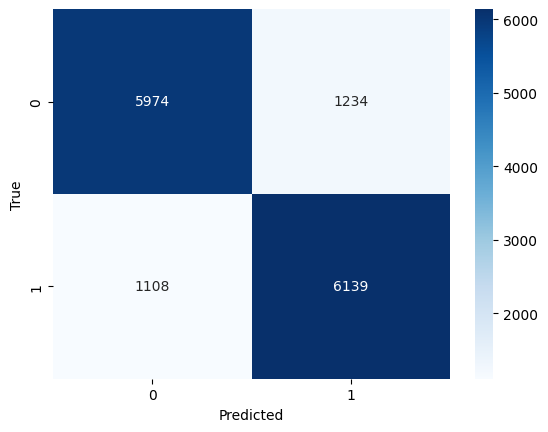

In [ ]:
metricas(y_pred,y_test)

Prediccion con el test

In [ ]:
y_pred_naive = bayesNaive.predict(df_test.review_es)

In [ ]:
ds_resultados = pd.DataFrame({'id': df_test_reviews['ID'], 'sentimiento': y_pred_naive})
ds_resultados.to_csv('bayes_base.csv', index=False)

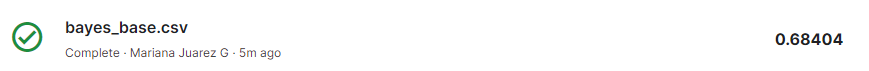

Con la comparación entre el modelo inicial y el modelo base, observamos que el análisis profundo de las reseñas perjudicó al desempeño del modelo.

###Búsqueda de mejores modelos/hiperparámetros

Luego de intentar entrenar el modelo con distintos conjuntos de entrenamiento (con el dataset preprocesado con ciertas características) concluímos que el preprocesamiento de los datos, sobre todo la lematización, perjudica el rendimiento del modelo. Por ese motivo, para el caso de Bayes, entrenamos el modelo con el dataset con el preprocesamiento de los datos pero sin la lematización.

In [ ]:
import sklearn

In [ ]:
from scipy.stats import uniform
from sklearn.metrics import make_scorer, f1_score

In [ ]:
f1_scorer = make_scorer(sklearn.metrics.f1_score)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_es = nltk.corpus.stopwords.words('spanish')
metrica = make_scorer(sklearn.metrics.f1_score)

####Bayes Multinomial

En scikit-learn, el clasificador MultinomialNB aplica el suavizado de Laplace de manera predeterminada. El parámetro correspondiente es alpha, y un valor positivo se utiliza para aplicar el suavizado.

In [ ]:
y_test_transformed = y_test.map(lambda x: 0 if x == 'positivo' else 1)
y_train_transformed = y_train.map(lambda x: 0 if x == 'positivo' else 1)

In [ ]:
param_dist_multinomial = {
    'multinomialnb__alpha': [0.1, 0.5, 1.0, 2.0, 0.8, 0.3, 1.5],
    'multinomialnb__fit_prior': [True, False],
    'multinomialnb__class_prior': [None, [0.2, 0.8], [0.5, 0.5], [0.3, 0.7]],
    'tfidfvectorizer__stop_words': ['english', stopwords_es, None],
    'tfidfvectorizer__max_df': [0.9, 0.95, 0.85, 0.98],
    'tfidfvectorizer__min_df': [0.05, 0.07, 0.1, 0.03],
    'tfidfvectorizer__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidfvectorizer__max_features': [10000, 15000, 20000, None],
}

In [ ]:
model = Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('multinomialnb', MultinomialNB())])

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist_multinomial,
    n_iter=300,
    cv=5,
    scoring=f1_scorer,
    random_state=42,
    n_jobs=-1
)

In [ ]:
if exists('/content/modelos/ModeloBayes-Multinomial.joblib') == False:
  random_search.fit(x_train.review_es, y_train_transformed)

  multinomial_hiperparametros =  make_pipeline(TfidfVectorizer(), MultinomialNB()).set_params(**random_search.best_params_)
  multinomial_hiperparametros.fit(x_train.review_es,y_train_transformed)

  dump(multinomial_hiperparametros, '/content/modelos/ModeloBayes-Multinomial.joblib')
else:
  multinomial_hiperparametros = load('/content/modelos/ModeloBayes-Multinomial.joblib')

In [ ]:
print("Mejores Parámetros:", random_search.best_params_)
print("Mejor Puntuación F1 en Validación Cruzada:", random_search.best_score_)

Mejores Parámetros: {'tfidfvectorizer__stop_words': 'english', 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__min_df': 0.03, 'tfidfvectorizer__max_features': 15000, 'tfidfvectorizer__max_df': 0.95, 'multinomialnb__fit_prior': True, 'multinomialnb__class_prior': None, 'multinomialnb__alpha': 0.3}
Mejor Puntuación F1 en Validación Cruzada: 0.8176773702430546


In [ ]:
y_pred = multinomial_hiperparametros.predict(x_test.review_es)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      7247
           1       0.83      0.80      0.82      7208

    accuracy                           0.82     14455
   macro avg       0.82      0.82      0.82     14455
weighted avg       0.82      0.82      0.82     14455



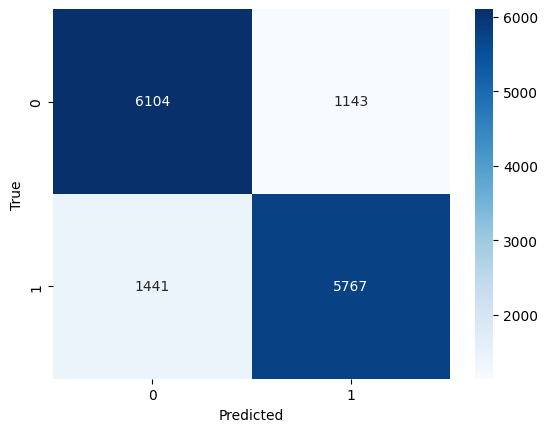

In [ ]:
metricas(y_pred,y_test_transformed)

Prediccion con el test

In [ ]:
y_pred_naive = multinomial_hiperparametros.predict(df_test.review_es)

In [ ]:
ds_resultados = pd.DataFrame({'id': df_test_reviews['ID'], 'sentimiento': y_pred_naive})
ds_resultados.head(10)

,id,sentimiento
0,60000,1
1,60001,0
2,60002,1
3,60003,1
4,60004,1
5,60005,1
6,60006,1
7,60007,1
8,60008,1
9,60009,1


In [ ]:
ds_resultados['sentimiento'] = ds_resultados['sentimiento'].replace({0: 'positivo', 1: 'negativo'})

In [ ]:
ds_resultados.to_csv('bayes_multinomial.csv', index=False)

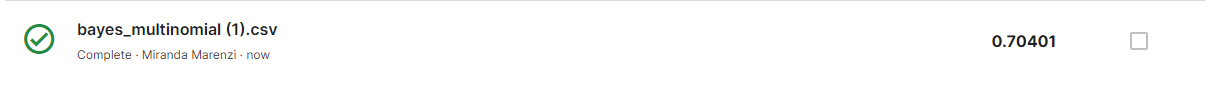

####Bayes Bernoulli

* alpha: Parámetro de suavizado, que controla la fuerza del suavizado de Laplace. Valores más altos dan más suavizado.

* binarize: Umbral para binarizar características (valores continuos se convierten en 0 o 1 según si son menores o iguales que el umbral). Si no se especifica, no se realiza binarización.

* fit_prior: Indica si se deben aprender las probabilidades a priori de las clases a partir de los datos. Si es False, se asumen probabilidades a priori uniformes.

In [ ]:
param_dist_bernoulli = {
    'bernoullinb__alpha': uniform(0.1, 2.0),
    'bernoullinb__binarize': uniform(0.1, 1.0),
    'bernoullinb__fit_prior': [True, False],
    'tfidfvectorizer__stop_words': ['english', stopwords_es, None],
    'tfidfvectorizer__max_df': [0.9, 0.95, 0.85, 0.98],
    'tfidfvectorizer__min_df': [0.05, 0.07, 0.1, 0.03],
    'tfidfvectorizer__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidfvectorizer__max_features': [10000, 15000, 20000, None],
}

In [ ]:
model = make_pipeline(TfidfVectorizer(), BernoulliNB())

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist_bernoulli,
    n_iter=300,
    cv=5,
    scoring=f1_scorer,
    random_state=42,
    n_jobs=-1
)

In [ ]:
if exists('/content/modelos/ModeloBayes-Bernoulli.joblib') == False:
  random_search.fit(x_train.texto_recodificado, y_train_transformed)

  bernoulli_hiperparametros =  make_pipeline(TfidfVectorizer(), BernoulliNB()).set_params(**random_search.best_params_)
  bernoulli_hiperparametros.fit(x_train.texto_recodificado,y_train_transformed)

  dump(bernoulli_hiperparametros, '/content/modelos/ModeloBayes-Bernoulli.joblib')
else:
  bernoulli_hiperparametros = load('/content/modelos/ModeloBayes-Bernoulli.joblib')

In [ ]:
print("Mejores Parámetros:", random_search.best_params_)
print("Mejor Puntuación F1 en Validación Cruzada:", random_search.best_score_)

Mejores Parámetros: {'bernoullinb__alpha': 1.705706897196023, 'bernoullinb__binarize': 0.10463202300460286, 'bernoullinb__fit_prior': True, 'tfidfvectorizer__max_df': 0.85, 'tfidfvectorizer__max_features': 20000, 'tfidfvectorizer__min_df': 0.03, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__stop_words': ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus'

In [ ]:
y_pred = bernoulli_hiperparametros.predict(x_test.review_es)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      7247
           1       0.83      0.76      0.79      7208

    accuracy                           0.80     14455
   macro avg       0.80      0.80      0.80     14455
weighted avg       0.80      0.80      0.80     14455



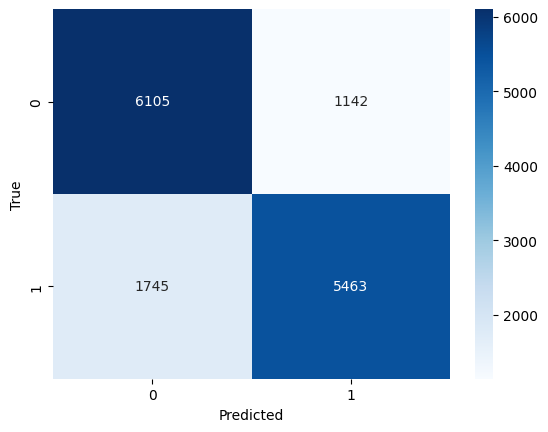

In [ ]:
metricas(y_pred,y_test_transformed)

Prediccion con el test

In [ ]:
y_pred_naive = bernoulli_hiperparametros.predict(df_test.review_es)

In [ ]:
ds_resultados = pd.DataFrame({'id': df_test_reviews['ID'], 'sentimiento': y_pred_naive})
ds_resultados['sentimiento'] = ds_resultados['sentimiento'].replace({0: 'positivo', 1: 'negativo'})

In [ ]:
ds_resultados.to_csv('bayes_bernoulli.csv', index=False)

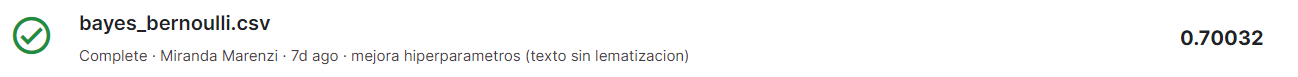

##Modelo 2: Random Forest

####Modelo base

Entrenamos este modelo con el dataset analizado por completo, habiendo probado anteriormente distintas combinaciones de procesamiento, la completa resultó ser la mejor.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
if exists('/content/modelos/ModeloRF-base.joblib') == False:
  rfc = RandomForestClassifier(max_features='auto',
                              oob_score=True,
                              random_state=2,
                              n_jobs=-1,
                              criterion="entropy",
                              min_samples_leaf=5,
                              min_samples_split=5,
                              n_estimators=50 )
  model = make_pipeline(TfidfVectorizer(), rfc)

  model.fit(x_train.review_es, y_train)

  dump(model, '/content/modelos/ModeloRF-base.joblib')
else:
  model = load('/content/modelos/ModeloRF-base.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
y_pred = model.predict(x_test.review_es)

              precision    recall  f1-score   support

    negativo       0.83      0.84      0.83      7208
    positivo       0.84      0.83      0.83      7247

    accuracy                           0.83     14455
   macro avg       0.83      0.83      0.83     14455
weighted avg       0.83      0.83      0.83     14455



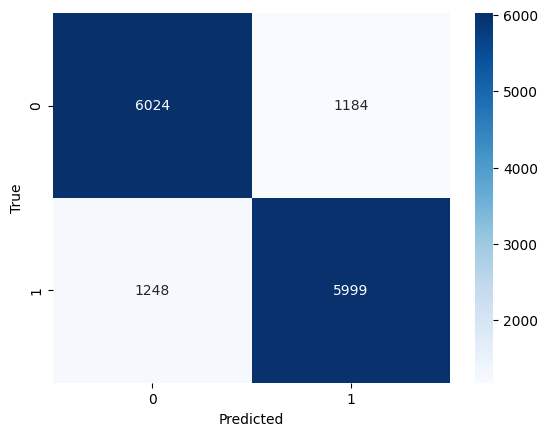

In [ ]:
metricas(y_pred,y_test)

In [ ]:
y_pred_rf = model.predict(df_test.review_es)

In [ ]:
y_pred_rf.shape

(8599,)

In [ ]:
ds_resultados = pd.DataFrame({'id': df_test_reviews['ID'], 'sentimiento': y_pred_rf})
ds_resultados.to_csv('rf_base_con_otros_parametros.csv', index=False)

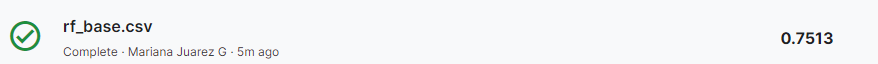

###Búsqueda de mejores modelos/hiperparámetros

In [ ]:
y_test_numericos = y_test.map(lambda x: 1 if x == 'negativo' else 0)
y_train_numericos = y_train.map(lambda x: 1 if x == 'negativo' else 0)

In [ ]:
mini_y_train_numericos= mini_y_train.map(lambda x: 1 if x == 'negativo' else 0)
gran_y_test_numericos= gran_y_test.map(lambda x: 1 if x == 'negativo' else 0)

In [ ]:
params_grid = { "randomforestclassifier__criterion" : ["gini", "entropy"],
                "randomforestclassifier__min_samples_leaf" : [15, 20, 30, 45, 60, 75, 80, 100],
                "randomforestclassifier__min_samples_split" : [40, 50, 60, 70, 80],
                "randomforestclassifier__n_estimators": [40, 50, 60, 70, 80, 90, 100]
}

Buscamos los mejores hiperparámetros primero con RandomSearch, lo cual nos entregó

{'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 50, 'randomforestclassifier__min_samples_leaf': 45,
'randomforestclassifier__criterion': 'gini'}

Una vez subida la predicción a Kaggle, no encontramos mejora. Así que si nuestro modelo base con parámetros al azar (bastante pequeños) nos hizo conseguir un score de 0.75, probaremos con GridSearch que siempre elegirá valores medianamente pequeños para evitar el overfitting a ver cómo resulta.

In [ ]:
rf_model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(class_weight="balanced"))
randomcv = GridSearchCV(rf_model, params_grid, cv=3, scoring='f1')

randomcv_prueba = randomcv.fit(mini_x_train.review_es, mini_y_train_numericos)

print(str(randomcv_prueba.best_params_))
print(str(randomcv_prueba.best_score_))

{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__min_samples_leaf': 15, 'randomforestclassifier__min_samples_split': 60, 'randomforestclassifier__n_estimators': 100}
0.8214451461055808


In [ ]:
if exists('/content/modelos/ModeloRF-mejores-hiper.joblib') == False:
  rf_mejorado =  make_pipeline(TfidfVectorizer(), RandomForestClassifier(class_weight="balanced")).set_params(**randomcv_prueba.best_params_)

  rf_mejorado.fit(x_train.review_es,y_train_numericos)

  dump(rf_mejorado, '/content/modelos/ModeloRF-mejores-hiper.joblib')
else:
  rf_mejorado = load('/content/modelos/ModeloRF-mejores-hiper.joblib')

In [ ]:
y_pred = rf_mejorado.predict(x_test.review_es)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      7247
           1       0.83      0.82      0.82      7208

    accuracy                           0.83     14455
   macro avg       0.83      0.83      0.83     14455
weighted avg       0.83      0.83      0.83     14455



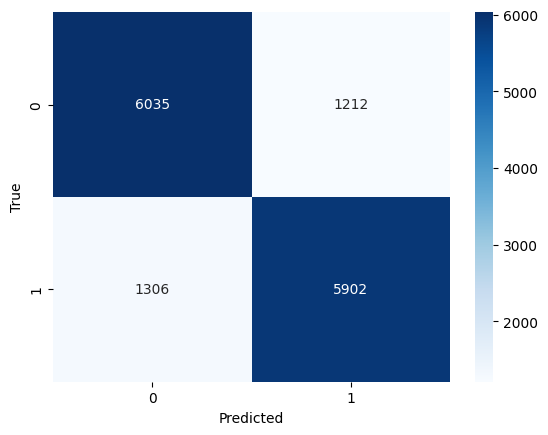

In [ ]:
metricas(y_pred,y_test_numericos)

In [ ]:
y_pred = rf_mejorado.predict(df_test.review_es)

In [ ]:
ds_resultados = pd.DataFrame({'id': df_test_reviews['ID'], 'sentimiento': y_pred})
ds_resultados['sentimiento'] = ds_resultados['sentimiento'].map({0: 'positivo', 1: 'negativo'})
ds_resultados.to_csv('rf_mejores_hiperparametros.csv', index=False)

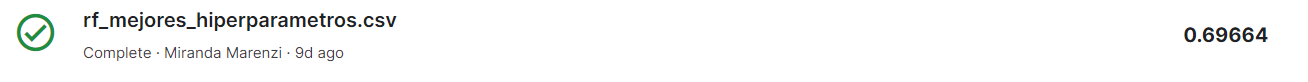

##Modelo 3: XGBoost

####Modelo base

In [ ]:
import xgboost as xgb

La version que usamos de XGBoost no soporta las etiquetas positivo/negativo, asi que las transformamos en 1 y 0.

In [ ]:
y_test_numericos = y_test.map(lambda x: 1 if x == 'negativo' else 0)
y_train_numericos = y_train.map(lambda x: 1 if x == 'negativo' else 0)

In [ ]:
mini_y_train_numericos= mini_y_train.map(lambda x: 1 if x == 'negativo' else 0)
gran_y_test_numericos= gran_y_test.map(lambda x: 1 if x == 'negativo' else 0)

In [ ]:
if exists('/content/modelos/ModeloXGB-base.joblib') == False:
  xgb_model = make_pipeline(TfidfVectorizer(), xgb.XGBClassifier(random_state=0, n_estimators=100))
  xgb_model.fit(x_train.review_es, y_train_numericos)

  dump(xgb_model, '/content/modelos/ModeloXGB-base.joblib')
else:
  xgb_model = load('/content/modelos/ModeloXGB-base.joblib')

In [ ]:
y_pred = xgb_model.predict(x_test.review_es)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      7247
           1       0.85      0.82      0.83      7208

    accuracy                           0.84     14455
   macro avg       0.84      0.84      0.84     14455
weighted avg       0.84      0.84      0.84     14455



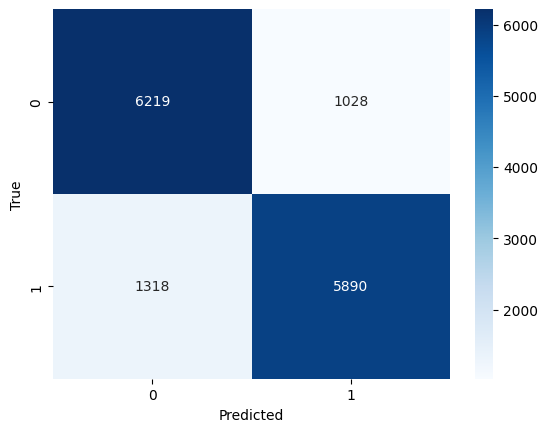

In [ ]:
metricas(y_pred,y_test_numericos)

In [ ]:
y_pred_xgb = xgb_model.predict(df_test.review_es)

In [ ]:
ds_resultados = pd.DataFrame({'id': df_test_reviews['ID'], 'sentimiento': y_pred_xgb})
ds_resultados['sentimiento'] = ds_resultados['sentimiento'].map({0: 'positivo', 1: 'negativo'})
ds_resultados.to_csv('xgboost_base.csv', index=False)

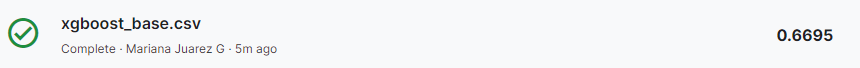

###Búsqueda de mejores modelos/hiperparámetros

El modelo XGBoost con la búsqueda de hiperparámetros ha funcionado más eficientemente utilizando el procesamiento sin tokenización, habiendo probado distintas combinaciones.

Para buscar los mejores hiperparametros, debemos tener en cuenta los del clasificador XGBoost y utilizaremos los hiperparametros default del TfidVectorizer, salvo la cantidad máxima de features y la máxima aparición de las palabras para no sobrecargar la notebook.


In [ ]:
params_grid = {
  'xgbclassifier__n_estimators': [50, 100, 150, 200],
  'xgbclassifier__max_depth': [10, 15, 20, 25],
  'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
  'xgbclassifier__min_child_weight': [1, 2, 3, 4, 5],
  'xgbclassifier__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
  'xgbclassifier__reg_alpha': [0, 0.001, 0.01, 0.1, 1],
  'xgbclassifier__reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}

In [ ]:
xgb_model = make_pipeline(TfidfVectorizer(), xgb.XGBClassifier())

randomcv = RandomizedSearchCV(xgb_model, params_grid, cv=3, scoring='f1', n_iter=2, random_state=5)

randomcv_prueba = randomcv.fit(mini_x_train.review_es, mini_y_train_numericos)

print(str(randomcv_prueba.best_params_))
print(str(randomcv_prueba.best_score_))

{'xgbclassifier__reg_lambda': 1, 'xgbclassifier__reg_alpha': 0, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__min_child_weight': 3, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.4, 'xgbclassifier__colsample_bytree': 0.7}
0.8291884358546106


In [ ]:
if exists('/content/modelos/ModeloXGB-mejores-hiper.joblib') == False:
  xgb_mejorado = make_pipeline(TfidfVectorizer(max_features = 5000, max_df = 0.5), xgb.XGBClassifier(reg_lambda = 1, reg_alpha = 0,
                                                              n_estimators = 150, min_child_weight =3, max_depth= 10,
                                                              learning_rate = 0.4, colsample_bytree = 0.7))
  xgb_mejorado.fit(x_train.review_es,y_train_numericos)

  dump(xgb_mejorado, '/content/modelos/ModeloXGB-mejores-hiper.joblib')
else:
  xgb_mejorado = load('/content/modelos/ModeloXGB-mejores-hiper.joblib')

In [ ]:
y_pred = xgb_mejorado.predict(x_test.review_es)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      7247
           1       0.86      0.84      0.85      7208

    accuracy                           0.85     14455
   macro avg       0.85      0.85      0.85     14455
weighted avg       0.85      0.85      0.85     14455



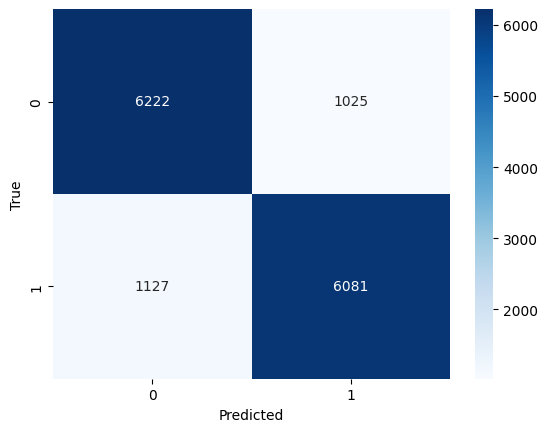

In [ ]:
metricas(y_pred,y_test_numericos)

In [ ]:
y_pred = xgb_mejorado.predict(df_test.review_es)

In [ ]:
ds_resultados = pd.DataFrame({'id': df_test_reviews['ID'], 'sentimiento': y_pred})
ds_resultados['sentimiento'] = ds_resultados['sentimiento'].map({0: 'positivo', 1: 'negativo'})
ds_resultados.to_csv('xgboost_mejores_hiperparametros.csv', index=False)

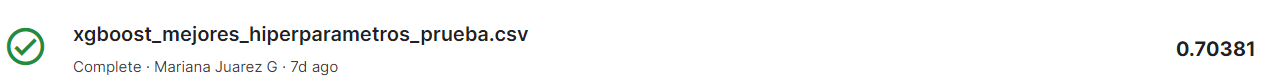

##Modelo 4: Red Neuronal Recurrente

###Proceso del texto



Vamos a definir un vocabulario con el que utilizarmos para entrenar la red. Es necesario reducir la cantidad de palabras ya que esta va a ser la cantidad de neuronas en nuestra entrada y una red neuronal con muchas neuronas no es eficiente.

Es importante previamente haber sacado las stopwords que son palabras altamaente frecuente pero que no aportan ningún tipo de significado a una reseña cinematográfica. Luego, para formar nuestro vocabulario necesitamos tokenizar. Esto ya fue implementado en el preprocesamiento del texto.

Ahora, vamos a tokenizar las reseñas y extraer las palabras más importantes

In [ ]:
reviews = df_train['texto_recodificado'].tolist()

In [ ]:
#Tokenización y secuenciación de texto
max_words = 15000
max_longitud_secuencia = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)

#Obtencion del diccionario de palabras a índices
word_index = tokenizer.word_index

#Secuencias de tokens
sequences = tokenizer.texts_to_sequences(reviews)
sequences_prueba = tokenizer.texts_to_sequences(df_test['review_es'].tolist())

data = pad_sequences(sequences, maxlen=max_longitud_secuencia)
test_padded = pad_sequences(sequences_prueba, maxlen=max_longitud_secuencia)

Para entrenar las redes, nuevamente definiremos el conjunto de entrenamiento, pero esta vez usando el dataframe obtenido en la tokenización

In [ ]:
df_train['sentimiento'] = df_train['sentimiento'].map(lambda x: 1 if x == 'positivo' else 0)

In [ ]:
df_trabajo_x = df_train['texto_recodificado']

df_trabajo_y = df_train['sentimiento'].copy()

x_train_rnn, x_test_rnn, y_train_rnn, y_test_rnn = train_test_split(data,
                                                    df_trabajo_y,
                                                    test_size=0.30,
                                                    random_state=9,
                                                    shuffle=True
                                                    )

In [ ]:
training_padded = np.array(x_train_rnn)
testing_padded = np.array(x_test_rnn)
testing_prueba_padded = np.array(test_padded)

In [ ]:
sequences = training_padded

###Modelo base (arquitectura)

Luego de la búsqueda manual por una mejor arquitectura, optamos por un modelo con capa embedding y capas intermedias de 128 neuronas cada una.

In [ ]:
embed_size = 128
vocab_size = max_words

model = keras.models.Sequential([

keras.layers.Embedding(vocab_size, embed_size,
        input_shape=[None]),

    keras.layers.GRU(128, return_sequences=True),

    keras.layers.GRU(128),

    keras.layers.Dropout(0.2),

    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
  loss='binary_crossentropy',
  metrics=['AUC']
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         1920000   
                                                                 
 gru_8 (GRU)                 (None, None, 128)         99072     
                                                                 
 gru_9 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,118,273
Trainable params: 2,118,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if exists('/content/modelos/ModeloRNNs-inicial.joblib') == False:
  model.fit(sequences, y_train_rnn, epochs=4)
  dump(model, '/content/modelos/ModeloRNNs-inicial.joblib')
else:
  model = load('/content/modelos/ModeloRNNs-inicial.joblib')

In [ ]:
y_pred = model.predict(testing_padded)

y_predic_cat_ej1 = np.where(y_pred>0.5,1,0)

y_predic_cat_ej1

452/452 [==============================] - 137s 299ms/step


array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7208
           1       0.84      0.90      0.87      7247

    accuracy                           0.86     14455
   macro avg       0.87      0.86      0.86     14455
weighted avg       0.87      0.86      0.86     14455



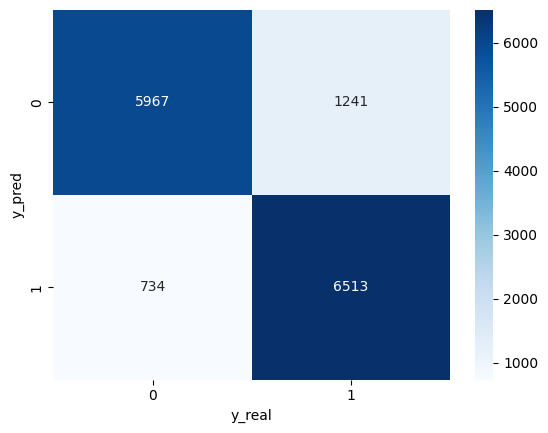

In [ ]:
ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test_rnn).reset_index()
ds_validacion.columns=['y_pred','y_real']

print(classification_report(y_test_rnn,y_predic_cat_ej1))

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt='g')
plt.show()

In [ ]:
y_pred_final = model.predict(testing_prueba_padded)

269/269 [==============================] - 77s 286ms/step


In [ ]:
y_pred_final = np.where(y_pred_final>0.5,1,0)
y_pred_final = y_pred_final.ravel()
y_pred_final

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
ds_resultados=pd.DataFrame({'id': df_test['ID'], 'sentimiento': y_pred_final})
ds_resultados.head(10)

,id,sentimiento
0,60000,0
1,60001,0
2,60002,0
3,60003,0
4,60004,0
5,60005,0
6,60006,0
7,60007,0
8,60008,0
9,60009,0


In [ ]:
ds_resultados['sentimiento'] = ds_resultados['sentimiento'].replace({1: 'positivo', 0: 'negativo'})

In [ ]:
ds_resultados.to_csv('red_neuronal_GRU.csv', index=False)

##Modelo 5: Ensamble Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

Realizamos un ensamble del tipo Voting para nuestros 3 modelos base de Bayes, Random Forest y XGBoost, la idea es convertir 3 predictores "débiles" en uno más fuerte.

In [ ]:
xgb_model = load('/content/modelos/ModeloXGB-base.joblib')
rf_model = load('/content/modelos/ModeloRF-base.joblib')
bayes_model = load('/content/modelos/ModeloBayes-base.joblib')

In [ ]:
if exists('/content/modelos/ModeloVoting-base.joblib') == False:

  vot_clf = VotingClassifier(estimators = [('xgb', xgb_model), ('rf', rf_model), ('bayes', bayes_model)], voting = 'hard')
  vot_clf.fit(x_train.review_es,y_train)

  dump(vot_clf, '/content/modelos/ModeloVoting-base.joblib')
else:
  vot_clf = load('/content/modelos/ModeloVoting-base.joblib')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

    negativo       0.87      0.87      0.87      7208
    positivo       0.87      0.87      0.87      7247

    accuracy                           0.87     14455
   macro avg       0.87      0.87      0.87     14455
weighted avg       0.87      0.87      0.87     14455



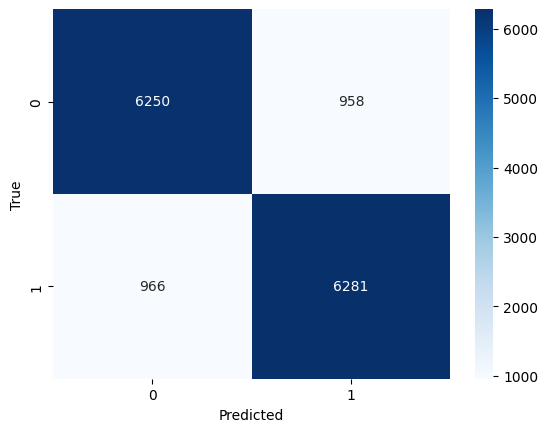

In [ ]:
y_pred = vot_clf.predict(x_test.review_es)
metricas(y_pred,y_test)

In [ ]:
y_pred_voting = vot_clf.predict(df_test.review_es)

In [ ]:
ds_resultados = pd.DataFrame({'id': df_test_reviews['ID'], 'sentimiento': y_pred_voting})
ds_resultados.to_csv('voting_con_modelos_base.csv', index=False)

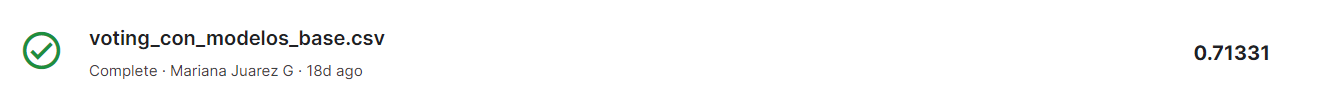